# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
##Three observable trends

# Cities which are near to equator will have high temperature 
# cities which are farther from equator will have low temperature
# cities below to norther or southern hemisphere shows same trend. Temperature increases when city is closer to equator
# There is not much coorelation found between latitude of city and the humidity or cloudiness or wind speed in those cities. 
# The cloudiness , humidity and wind speed of a city does not depend on the city location ( near or farther from equator)

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
output_data_file1 = "../output_data/cleancities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)




In [6]:
# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
# set up lists to hold reponse info
lat = []
lng = []
MaxTemp = []
Humidity = []
Cloudiness = []
WindSpeed = []
Country = []
citylist = []
datelist = []


recordcounter = 0
setcounter = 1
totalcounter = 0

print ("Beginning Data Retrieval     ")
print("-----------------------------")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        MaxTemp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        WindSpeed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        datelist.append(response["dt"])
        print(f"Processing Record {recordcounter} of Set {setcounter} | {city}")
        recordcounter = recordcounter + 1
        totalcounter = totalcounter + 1
        citylist.append(city)
        if recordcounter == 50 :
            setcounter = setcounter + 1
            recordcounter = 0
    except KeyError:
        print('City not found. Skipping...')
    except Exception:
        print('Different Exception...')

print("-----------------------------")
print("Data Retrieval Complete  ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | mweka
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | aykhal
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | tautira
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | corrente
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | guamal
Processing Record 10 of Set 1 | timmins
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | marfino
Processing Record 13 of Set 1 | ballina
Processing Record 14 of Set 1 | moron
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | luau
Processing Record 18 of Set 1 | bandarbeyla
Processing Record 19 of Set 1 | mataura
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | pun

Processing Record 40 of Set 4 | boralday
Processing Record 41 of Set 4 | tlacotepec
Processing Record 42 of Set 4 | linxia
Processing Record 43 of Set 4 | port moresby
Processing Record 44 of Set 4 | svetlogorsk
Processing Record 45 of Set 4 | luganville
Processing Record 46 of Set 4 | tecoanapa
Processing Record 47 of Set 4 | fort nelson
Processing Record 48 of Set 4 | tahe
City not found. Skipping...
Processing Record 49 of Set 4 | arroyos y esteros
City not found. Skipping...
Processing Record 0 of Set 5 | ust-tsilma
Processing Record 1 of Set 5 | ovsyanka
Processing Record 2 of Set 5 | shingu
Processing Record 3 of Set 5 | khandyga
Processing Record 4 of Set 5 | helong
Processing Record 5 of Set 5 | arcata
Processing Record 6 of Set 5 | nouadhibou
City not found. Skipping...
Processing Record 7 of Set 5 | isangel
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | elbrus
Processing Record 11 of Set 5 | nara
Processing Reco

Processing Record 28 of Set 8 | el alto
City not found. Skipping...
Processing Record 29 of Set 8 | newcastle
Processing Record 30 of Set 8 | roi et
Processing Record 31 of Set 8 | doembang nangbuat
Processing Record 32 of Set 8 | menongue
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | waddan
Processing Record 35 of Set 8 | atar
City not found. Skipping...
Processing Record 36 of Set 8 | mehran
Processing Record 37 of Set 8 | otradnoye
Processing Record 38 of Set 8 | kaputa
Processing Record 39 of Set 8 | belmonte
Processing Record 40 of Set 8 | fatehpur
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | zamora
Processing Record 43 of Set 8 | elko
Processing Record 44 of Set 8 | port arthur
Processing Record 45 of Set 8 | tongliao
Processing Record 46 of Set 8 | bilibino
Processing Record 47 of Set 8 | bendigo
Processing Record 48 of Set 8 | neiafu
Processing Record 49 of Set 8 | pekan nenas
Processing Record 0 of Set 9 | mamallapuram
Pr

Processing Record 15 of Set 12 | sao jose da coroa grande
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | namatanai
City not found. Skipping...
Processing Record 18 of Set 12 | college
Processing Record 19 of Set 12 | oranjemund
Processing Record 20 of Set 12 | la asuncion
Processing Record 21 of Set 12 | mandalgarh
Processing Record 22 of Set 12 | ambon
Processing Record 23 of Set 12 | jos
Processing Record 24 of Set 12 | san miguel
City not found. Skipping...
Processing Record 25 of Set 12 | sao miguel do araguaia
Processing Record 26 of Set 12 | ranong
Processing Record 27 of Set 12 | ugoofaaru
Processing Record 28 of Set 12 | oktyabrskiy
Processing Record 29 of Set 12 | milkovo
Processing Record 30 of Set 12 | cumana
Processing Record 31 of Set 12 | santa cruz
Processing Record 32 of Set 12 | chabahar
Processing Record 33 of Set 12 | sal rei
Processing Record 34 of Set 12 | dalvik
Processing Record 35 of Set 12 | nabire
Processing Record 36 of Set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_dict = {"City":  citylist,
            "Lat" : lat,
             "Lng" : lng,
             "Max Temp": MaxTemp,
             "Humidity" : Humidity,
             "Cloudiness": Cloudiness,
             "Wind Speed" : WindSpeed,
             "Country" : Country,
              "Date" : datelist}
city_df = pd.DataFrame(city_dict)# Create a dataframe
city_df.to_csv(output_data_file, index=False, header=True)
city_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [10]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mweka,-4.85,21.57,18.22,39,28,0.69,CD,1592428524
1,ushuaia,-54.80,-68.30,3.00,74,40,1.50,AR,1592428524
2,cape town,-33.93,18.42,10.56,76,58,1.50,ZA,1592428265
3,aykhal,66.00,111.50,11.00,53,0,2.00,RU,1592428525
4,pevek,69.70,170.31,6.69,64,99,2.28,RU,1592428525


In [11]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,6.030000e+02
mean,18.756667,20.708922,20.265788,67.897181,45.349917,3.769088,1.592429e+09
std,33.125208,89.872789,8.096351,22.032806,38.821492,2.477315,6.993529e+01
min,-54.800000,-179.170000,0.000000,7.000000,0.000000,0.160000,1.592428e+09
25%,-8.620000,-58.090000,15.000000,54.000000,2.500000,1.970000,1.592429e+09
50%,21.600000,25.950000,21.000000,74.000000,40.000000,3.100000,1.592429e+09
75%,46.485000,101.920000,26.655000,86.000000,88.000000,4.960000,1.592429e+09
max,78.220000,179.320000,39.400000,100.000000,100.000000,14.560000,1.592429e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
cityhumidityfilter_list = city_df[city_df["Humidity"] > 100].index.to_list()
cityhumidityfilter_list

[]

In [13]:
#  Get the indices of cities that have humidity over 100%.
cityhumidityfilter_list = city_df[city_df["Humidity"] > 100].index.to_list()
cityhumidityfilter_list

[]

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
Q1 = city_df["Humidity"].quantile(0.25)
Q3 = city_df["Humidity"].quantile(0.75)
IQR = Q3 - Q1
print((Q3 + 1.5 * IQR))
print ((Q1 - 1.5 * IQR))
print(IQR)
index = city_df[(city_df['Humidity'] >= (Q3 + 1.5 * IQR))|(city_df['Humidity'] <= (Q1 - 1.5 * IQR))].index
clean_city_df1 = city_df.drop(index, inplace=False)
clean_city_df1.head()

134.0
6.0
32.0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mweka,-4.85,21.57,18.22,39,28,0.69,CD,1592428524
1,ushuaia,-54.80,-68.30,3.00,74,40,1.50,AR,1592428524
2,cape town,-33.93,18.42,10.56,76,58,1.50,ZA,1592428265
3,aykhal,66.00,111.50,11.00,53,0,2.00,RU,1592428525
4,pevek,69.70,170.31,6.69,64,99,2.28,RU,1592428525


In [20]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_df1.to_csv(output_data_file1, index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

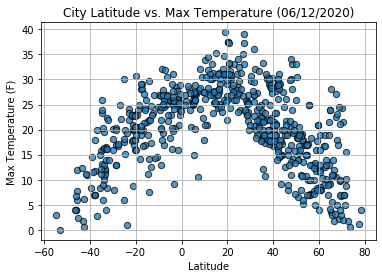

In [21]:
clean_city_df1.plot(kind='scatter',x='Lat',y='Max Temp', s=40 ,marker="o", facecolors="red", edgecolors="black", alpha=0.75,grid=True, figsize=(6,4),
              title="City Latitude vs. Max Temperature (06/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(clean_city_df1["Max Temp"].min() - 2, clean_city_df1["Max Temp"].max() + 2)
plt.savefig("../output_data/MaxTempVsLatitude.png")
plt.show()

In [29]:
### The above plot is analyzing the maximum temperature values for cities near to equator and farther from equator
## The above graph proves the temperature of cities drops as they move farther from equator

## Latitude vs. Humidity Plot

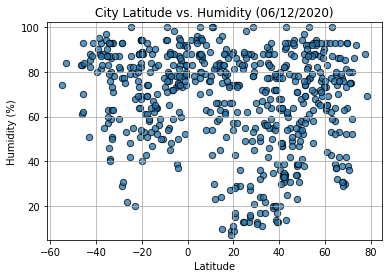

In [22]:
clean_city_df1.plot(kind='scatter',x='Lat',y='Humidity', s=40 ,marker="o", facecolors="red", edgecolors="black", alpha=0.75,grid=True, figsize=(6,4),
              title="City Latitude vs. Humidity (06/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(clean_city_df1["Humidity"].min() - 2, clean_city_df1["Humidity"].max() + 2)
plt.savefig("../output_data/HumidityVsLatitude.png")
plt.show()

In [ ]:
### The above plot is analyzing how the humidity changes for cities as they move from closer to equator or farther from equator
### Lat 0 is equator

## Latitude vs. Cloudiness Plot

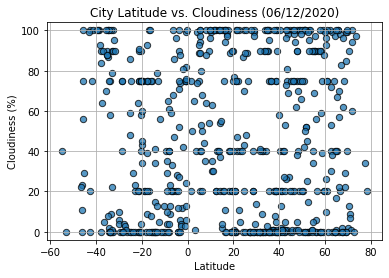

In [23]:
clean_city_df1.plot(kind='scatter',x='Lat',y='Cloudiness',s=40, marker="o", facecolors="red", edgecolors="black", alpha=0.75,grid=True, figsize=(6,4),
              title="City Latitude vs. Cloudiness (06/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(clean_city_df1["Cloudiness"].min() - 4, clean_city_df1["Cloudiness"].max() + 4)
plt.savefig("../output_data/CloudinessVsLatitude.png")
plt.show()

In [ ]:
### The above plot is analyzing how the cloudiness changes for cities as they move from closer to equator or farther from equator
### Lat 0 is equator

## Latitude vs. Wind Speed Plot

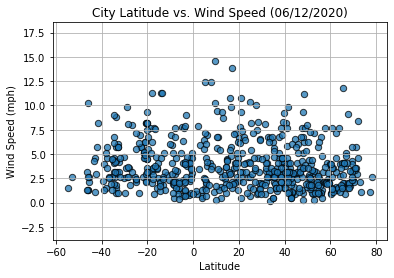

In [24]:
clean_city_df1.plot(kind='scatter',x='Lat',y='Wind Speed',s=40, marker="o", facecolors="red", edgecolors="black", alpha=0.75,grid=True, figsize=(6,4),
              title="City Latitude vs. Wind Speed (06/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(clean_city_df1["Wind Speed"].min() - 4, clean_city_df1["Wind Speed"].max() + 4)
plt.savefig("../output_data/WindeSpeedVsLatitude.png")
plt.show()

In [ ]:
### The above plot is analyzing if the wind speed of a city depends on the loction of city ( near to equator or farther from equator)

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_Reg(x_values, y_values, xlabel, ylabel,valuex, valuey, imagename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(valuex,valuey),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig("../output_data/" + imagename)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hem_df = clean_city_df1[clean_city_df1["Lat"] >= 0]
Southern_Hem_df = clean_city_df1[clean_city_df1["Lat"] < 0]
Northern_Hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,aykhal,66.00,111.50,11.00,53,0,2.00,RU,1592428525
4,pevek,69.70,170.31,6.69,64,99,2.28,RU,1592428525
6,albany,42.60,-73.97,31.11,32,0,0.89,US,1592428360
8,hofn,64.25,-15.21,9.48,64,0,2.69,IS,1592428525
9,guamal,9.14,-74.22,30.53,76,54,1.11,CO,1592428525


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.487533611268224


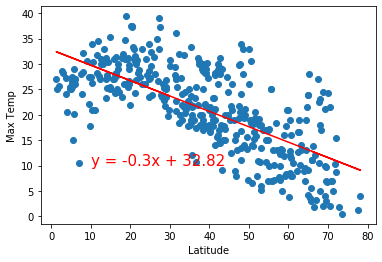

In [27]:
lin_Reg(Northern_Hem_df["Lat"], Northern_Hem_df["Max Temp"], "Latitude", "Max Temp", 10, 10,"NorthHemeMaxTempVsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5114409946181179


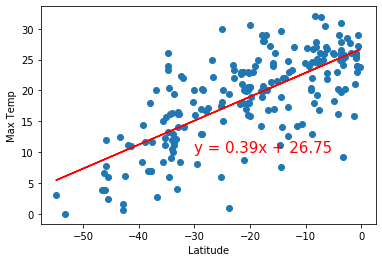

In [28]:
lin_Reg(Southern_Hem_df["Lat"], Southern_Hem_df["Max Temp"], "Latitude", "Max Temp", -30, 10,"SouthHemMaxTempVsLat.png")

In [29]:
### Latitude and Max temp looks postively correlated.  
### Cities near to equator has high max temperature as compared to cities farther from equator 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00010925519426918808


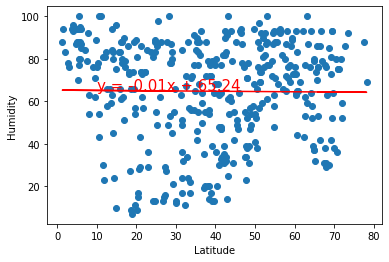

In [30]:
lin_Reg(Northern_Hem_df["Lat"], Northern_Hem_df["Humidity"], "Latitude", "Humidity", 10, 65,"NorthHemHumidityVsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0020449487162423215


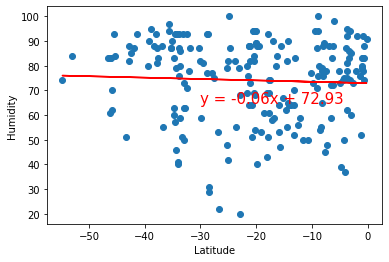

In [31]:
lin_Reg(Southern_Hem_df["Lat"], Southern_Hem_df["Humidity"], "Latitude", "Humidity", -30, 65,"SouthHemHumidityVsLat.png")

In [32]:
### Latitude is negatively coorelated to humidity
### Humidity of a city doesn't depend on city location ( near or farther from equator)
# The regression does not display much of a correlation between the data sets.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00483002724761302


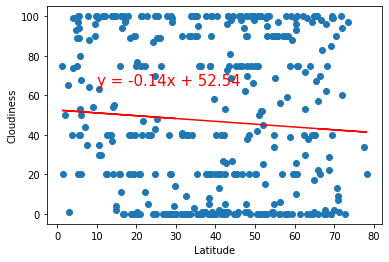

In [33]:
lin_Reg(Northern_Hem_df["Lat"], Northern_Hem_df["Cloudiness"], "Latitude", "Cloudiness", 10, 65,"NorthHemCloudinessVsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013856685464487442


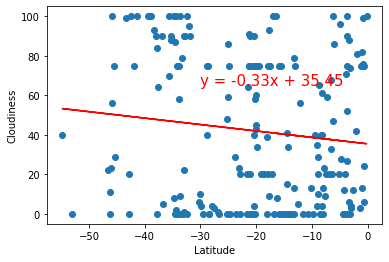

In [34]:
lin_Reg(Southern_Hem_df["Lat"], Southern_Hem_df["Cloudiness"], "Latitude", "Cloudiness", -30, 65, "SouthHemCloudinessVsLat.png")

In [35]:
### Latitude is negatively coorelated to cloudiness
### Cloudiness of a city doesn't depend on city location ( near or farther from equator)
# The regression does not display much of a correlation between the data sets.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.030629386349824383


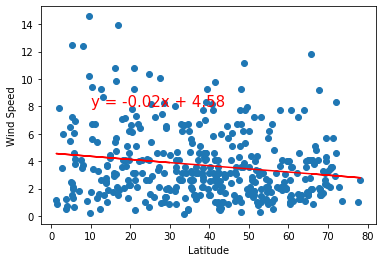

In [36]:
lin_Reg(Northern_Hem_df["Lat"], Northern_Hem_df["Wind Speed"], "Latitude", "Wind Speed", 10, 8,"NorthHemWindSpeedVsLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0018929163893053854


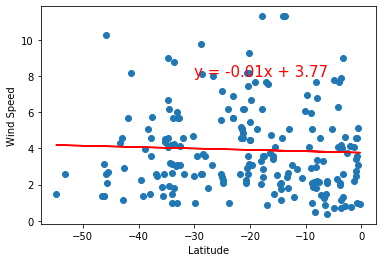

In [37]:
lin_Reg(Southern_Hem_df["Lat"], Southern_Hem_df["Wind Speed"], "Latitude", "Wind Speed", -30, 8,"SouthHemWindSpeedVsLat.png")

In [ ]:
### Latitude is negatively coorelated to wind speed
### Wind speed of a city doesn't depend on city location ( near or farther from equator)
# The regression does not display much of a correlation between the data sets.